In [1]:
from pyautoml import Clean, Preprocess, Feature, Model
import pandas as pd
%matplotlib inline

train_data = pd.read_csv('data/train.csv')

Loading BokehJS ...

In [2]:
clean = Clean(data=train_data, target_field='Survived', report_name='Titanic')

In [3]:
# clean.data_report(title='Titanic Summary', output_file='titanic_summary.html')

## Cleaning

In [4]:
clean.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,712,712,712,NaN,NaN,575,712,712,NaN,712,NaN,NaN
mean,455.42,0.390449,2.28792,NaN,NaN,29.8332,0.504213,0.376404,NaN,31.7854,NaN,NaN
std,255.12,0.488194,0.840247,NaN,NaN,14.5204,1.0726,0.782297,NaN,45.8431,NaN,NaN
min,2,0,1,NaN,NaN,0.42,0,0,NaN,0,NaN,NaN
25%,234.75,0,1.75,NaN,NaN,20.25,0,0,NaN,7.9177,NaN,NaN
50%,461,0,3,NaN,NaN,28,0,0,NaN,14.4542,NaN,NaN
75%,675.25,1,3,NaN,NaN,38,1,0,NaN,31.3875,NaN,NaN
max,891,1,3,NaN,NaN,80,8,5,NaN,512.329,NaN,NaN
counts,712,712,712,712,712,575,712,712,712,712,172,710
uniques,712,2,3,712,2,85,7,6,567,225,127,3


In [5]:
clean.column_info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
counts,712,712,712,712,712,575,712,712,712,712,172,710
uniques,712,2,3,712,2,85,7,6,567,225,127,3
missing,0,0,0,0,0,137,0,0,0,0,540,2
missing_perc,0%,0%,0%,0%,0%,19.24%,0%,0%,0%,0%,75.84%,0.28%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,numeric,categorical,categorical


mean                        31.7854
std                         45.8431
variance                    2101.59
min                               0
max                         512.329
mode                             13
5%                          7.13419
25%                          7.9177
50%                         14.4542
75%                         31.3875
95%                          111.96
iqr                         23.4698
kurtosis                    24.8654
skewness                    4.09147
sum                         22631.2
mad                         27.3856
cv                          1.44227
zeros_num                        11
zeros_perc                    1.54%
deviating_of_mean                16
deviating_of_mean_perc        2.25%
deviating_of_median              42
deviating_of_median_perc      5.90%
top_correlations                   
counts                          712
uniques                         225
missing                           0
missing_perc                

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


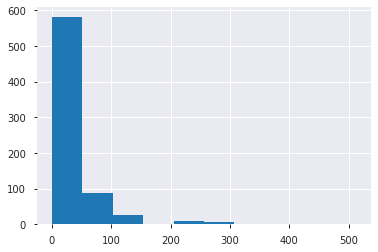

In [6]:
clean.describe_column('Fare')

31.78539255617978

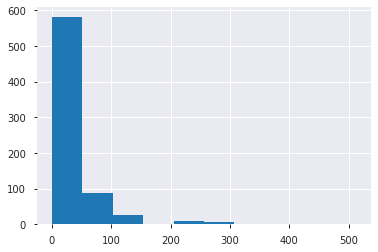

In [7]:
clean.describe_column('Fare')['mean']

In [8]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,540.000000,137.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.758427,0.192416,0.002809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,147.000000,40.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.821229,0.223464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
iter1 = clean.replace_missing_mostcommon('Fare', 'Embarked')

In [10]:
iter1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,NaN,133.65,S
1,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,D35,52.5542,S
2,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,D56,13,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,NaN,13,S
4,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,NaN,7.8958,S


In [11]:
iter1.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,540.000000,137.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.758427,0.192416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,147.000000,40.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.821229,0.223464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


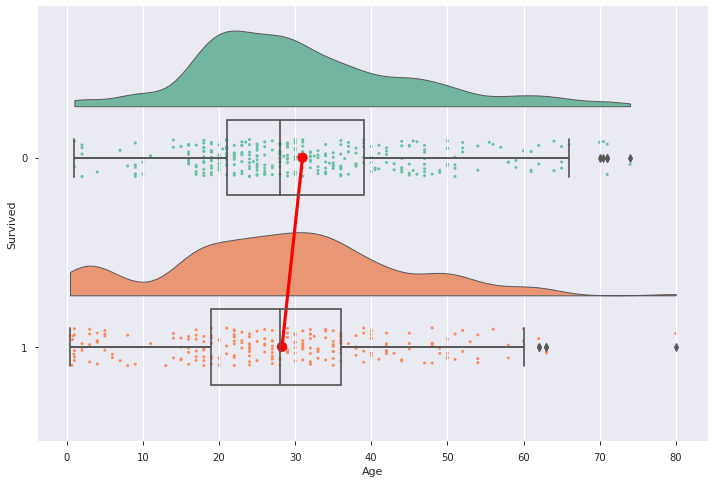

In [12]:
clean.visualize_raincloud('Age')

In [13]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,540.000000,137.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.758427,0.192416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,147.000000,40.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.821229,0.223464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
clean.replace_missing_random_discrete('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,2.0,1,0,PC 17611,NaN,133.65,S
1,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,D35,52.5542,S
2,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,D56,13,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,NaN,13,S
4,30,0,3,"Todoroff, Mr. Lalio",male,18.0,0,0,349216,NaN,7.8958,S


In [15]:
clean.missing_values

,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,540.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.758427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,147.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.821229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
## Proving iter1 is a completely separate instance

iter1.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,540.000000,137.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.758427,0.192416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,147.000000,40.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.821229,0.223464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
clean.visualize_barplot('Age', 'Survived', groupby='Age', method='mean', xlabel='Age')

In [18]:
clean.drop('Cabin')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,2.0,1,0,PC 17611,133.65,S
1,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S
2,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13,S
4,30,0,3,"Todoroff, Mr. Lalio",male,18.0,0,0,349216,7.8958,S


In [19]:
clean.column_info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
counts,712,712,712,712,712,712,712,712,712,712,712
uniques,712,2,3,712,2,85,7,6,567,225,3
missing,0,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,categorical,categorical


In [20]:
clean.visualize_scatterplot('Age', 'Fare', fill_color='yellow')

## Feature Engineering

In [21]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Nobel",
                    "Don":        "Nobel",
                    "Sir" :       "Nobel",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Nobel",
                    "Dona":       "Nobel",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Nobel"
                    } 

feature = Feature(clean)

In [22]:
feature.apply(lambda x: Title_Dictionary[x['Name'].split(',')[1].split('.')[0].strip()], 'Title')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,2.0,1,0,PC 17611,133.6500,S,Mrs
1,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S,Mrs
2,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,S,Mr
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,S,Mr
4,30,0,3,"Todoroff, Mr. Lalio",male,18.0,0,0,349216,7.8958,S,Mr


In [23]:
feature['FamilySize'] = ( feature['SibSp'] + feature['Parch'],
                         feature.test_data['SibSp'] + feature.test_data['SibSp'] )

In [24]:
feature

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,2.0,1,0,PC 17611,133.6500,S,Mrs,1
1,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S,Mrs,2
2,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,S,Mr,0
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,S,Mr,0
4,30,0,3,"Todoroff, Mr. Lalio",male,18.0,0,0,349216,7.8958,S,Mr,0


In [25]:
## Can still do apply and it will apply to both train and test dataset.

def get_person(passenger):
    age = passenger['Age']
    sex = passenger['Sex']
    return 'child' if age < 16 else sex

feature.apply(get_person, 'Person')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,2.0,1,0,PC 17611,133.6500,S,Mrs,1,child
1,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S,Mrs,2,female
2,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,S,Mr,0,male
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,S,Mr,0,male
4,30,0,3,"Todoroff, Mr. Lalio",male,18.0,0,0,349216,7.8958,S,Mr,0,male


In [26]:
## Can still do lambda.

feature.apply(lambda x: 'child' if x['Age'] < 16 else x['Sex'], 'Person')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,2.0,1,0,PC 17611,133.6500,S,Mrs,1,child
1,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S,Mrs,2,female
2,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,S,Mr,0,male
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,S,Mr,0,male
4,30,0,3,"Todoroff, Mr. Lalio",male,18.0,0,0,349216,7.8958,S,Mr,0,male


In [27]:
feature.drop('Name', 'Ticket', 'SibSp', 'Parch', 'Sex', 'PassengerId')

,Survived,Pclass,Age,Fare,Embarked,Title,FamilySize,Person
0,1,1,2.0,133.6500,S,Mrs,1,child
1,1,1,47.0,52.5542,S,Mrs,2,female
2,1,2,34.0,13.0000,S,Mr,0,male
3,0,2,19.0,13.0000,S,Mr,0,male
4,0,3,18.0,7.8958,S,Mr,0,male


In [28]:
feature.onehot_encode('Person', 'Embarked', 'Title', 'Pclass', keep_col=False)

,Survived,Age,Fare,FamilySize,Person_child,Person_female,Person_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Nobel,Title_Officer,Pclass_1,Pclass_2,Pclass_3
0,1,2.0,133.6500,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,47.0,52.5542,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,34.0,13.0000,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,19.0,13.0000,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,18.0,7.8958,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Modelling

In [29]:
model = Model(feature)

In [30]:
model.logistic_regression()

/home/sidha62/.virtualenvs/pyautoml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
model.list_models()

######## QUEUED MODELS ########
No queued models.

######### RAN MODELS ##########
log_reg


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


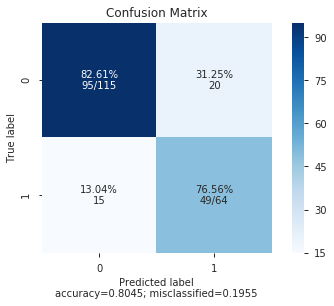

In [32]:
model.log_reg.confusion_matrix(hide_counts=False)

In [33]:
model.log_reg.roc_curve()